#                                   ANOVA-TEST

 Table of Contents

1. [Introduction ](#section1)<br>
2. [Terminologies related to ANOVA TEST](#section2)
3. [Problem Statement](#section3) 
4. [One Way ANOVA](#section4)
    - 4.1 [F-Distribution](#section401)<br/> 
    - 4.2 [The regression formula](#section402)<br/>
    - 4.3 [Post-hoc comparison](#section403)<br/>
    - 4.4 [Conclusion](#section403)<br/>


<a id=section1></a> 
## 1.Introduction

The analysis of variance or ANOVA is a statistical inference test that lets you compare multiple groups at the same time.ANOVA checks the impact of one or more factors by comparing the means of different samples.

**F = Between group variability / Within group variability**

<a id=section2></a> 
## 2.Terminologies

**Grand Mean**

Mean is a simple or arithmetic average of a range of values. There are two kinds of means that we use in ANOVA calculations, which are separate sample means(μ1,μ2,μ3,μ4) and the grand mean(μ)  . The grand mean is the mean of sample means or the mean of all observations combined, irrespective of the sample.


**Hypothesis**

 A hypothesis is an educated guess about something in the world around us. It should be testable either by experiment or observation.Just like any other kind of hypothesis that you might have studied in statistics, ANOVA also uses a Null hypothesis and an Alternate hypothesis. The Null hypothesis in ANOVA is valid when all the sample means are equal, or they don’t have any significant difference. Thus, they can be considered as a part of a larger set of the population. On the other hand, the alternate hypothesis is valid when at least one of the sample means is different from the rest of the sample means. 

**Between Group Variability**

The **variability** between the distributions called Between-group variability. It refers to variations between the distributions of individual groups (or levels) as to check the values within each group are different or same
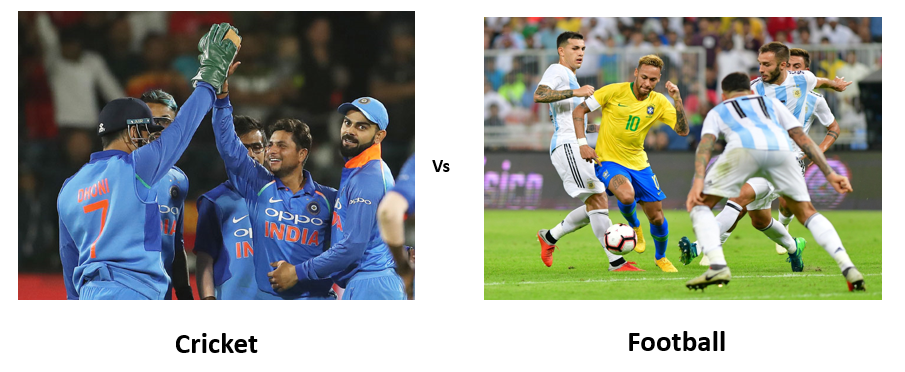





**Within-group variation** 

It refers to variations caused by differences within individual groups (or levels) as not all the values within each group are the same. Each sample is looked at on its own and variability between the individual points in the sample is calculated. In other words, no interactions between samples are considered.We can measure Within-group variability by looking at how much each value in each sample differs from its respective sample mean.

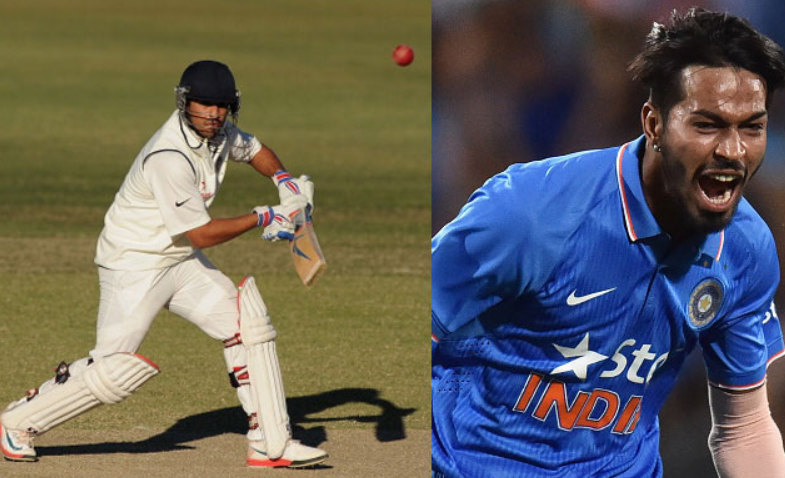

**F-Statistic**

The statistic which measures if the means of different samples are significantly different or not is called the F-Ratio. Lower the F-Ratio, more similar are the sample means. In that case, we cannot reject the null hypothesis.

  **F = Between group variability / Within group variability**
  



<a id=section3></a> 

## 3.Problem Statement

- Two fertilizer Comparision : This data is fictional; a study was conducted to test the effect of 3  new fertilizers, and the amount of water on the mean crop yield. 


<a id=section4></a> 
## 4. One Way Anova Test

A one-way ANOVA tells us that at least two groups are different from each other.We have data for three fertizers,lets check whether their potenital are same or not.

- H0: No difference between means, i.e. ͞μA = ͞μB =  ͞μC
- Ha: Difference between means exist somewhere, i.e. ͞μA ≠ ͞μB≠ ͞μC

In [27]:

#import researchpy as rp
#import seaborn as sns
import statsmodels.api as sm
#from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
import pandas as pd
import scipy.stats as stats
#import researchpy as rp    
#import matplotlib.pyplot as plt
fert_data = pd.read_excel("Ferti.xlsx")

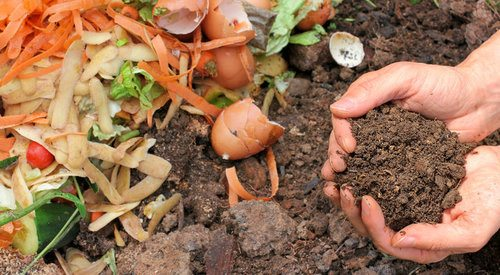

In [25]:
fert_data["Yield"].describe()

count    30.00000
mean     28.59800
std       4.83169
min      19.40000
25%      25.55000
50%      29.60000
75%      32.92500
max      35.20000
Name: Yield, dtype: float64

<a id=section401></a> 
### F-distribution
**For one-way ANOVA, the ratio of the between-group variability to the within-group variability follows an F-distribution when the null hypothesis is true**

In [26]:
stats.f_oneway(fert_data['Yield'][fert_data['Fert'] == 'A'], 
             fert_data['Yield'][fert_data['Fert'] == 'B'],
             fert_data['Yield'][fert_data['Fert'] == 'C'])

F_onewayResult(statistic=1.8324797259724102, pvalue=0.1793653242201808)

**Results:**
- Fstats = **1.83**
- pvalue = **0.18**

**Insights**

- Fstats value conveys that in between all three fertilizers yield is significant as compared to within group.
- While ,pvalue is greater than level of significance,so we cann't neglect null hypothesis

### Tukey HSD post-hoc comparison

To decide which groups is to be compared :

In [28]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(fert_data['Yield'], fert_data['Fert'])
mc_results = mc.tukeyhsd()
print(mc_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     A      B    -3.72 0.1986 -8.9291 1.4891  False
     A      C   -3.186 0.2997 -8.3951 2.0231  False
     B      C    0.534    0.9 -4.6751 5.7431  False
---------------------------------------------------


- The Tukey HSD post-hoc comparison test controls for type I error and maintains the familywise error rate at 0.05 (FWER= 0.05 top of the table). 
- The group1 and group2 columns are the groups being compared, the meandiff column is the difference in means of the two groups being calculated as group2  group1, 
- the lower/upper columns are the lower/upper boundaries of the 95% confidence interval, and the reject column states whether or not the null hypothesis should be rejected. Unfortunately, this method currently does not provide the t-statistic so treatment effect size cannot be calculated.


### Insights
- In all three combinations no fair combination is seen

### Bonferroni Correction Post-hoc Comparison

First the corrected p-value needs to be calculated. This can be done using the formula:

  **p-value/ all  of comparisons = 0.05/3 = 0.01667**

Lets  conduct t-test to have a p-value less than **0.01667** in order to be considered significant.

In [29]:
stats.ttest_ind(fert_data['Yield'][fert_data['Fert'] == 'A'], fert_data['Yield'][fert_data['Fert'] == 'B'])

Ttest_indResult(statistic=2.1443465049813817, pvalue=0.04590672857099709)

In [30]:
stats.ttest_ind(fert_data['Yield'][fert_data['Fert'] == 'A'], fert_data['Yield'][fert_data['Fert'] == 'C'])

Ttest_indResult(statistic=1.4708068443752746, pvalue=0.15860906522265303)

In [31]:
stats.ttest_ind(fert_data['Yield'][fert_data['Fert'] == 'B'], fert_data['Yield'][fert_data['Fert'] == 'C'])

Ttest_indResult(statistic=-0.22677535733874088, pvalue=0.8231539137576259)

Using the Bonferroni correction, none of the  difference is significant.So We dont have a valid reason to reject null.

<a id=section404></a> 
### Conclusion

We don't have a valid reason to neglect null hypothesis thus we can say that there is not a significant difference between the yields of all the three fertilizers. So we cannt say which is best.

- The model passes the assumption check, which is excellent. 
